In [1]:
# activate virtual environment with:
# C:\Users\mosco\.venvs\b1-scientific-coding\Scripts\activate.ps1

In [1]:
# Add relevant Jupyter notebook extensions 
import numpy as np

In [2]:
# You can double-check your Python path like this...
import sys  

sys.path.append('../')
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding', '', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages\\win32', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\mosco\\.venvs\\b1-scientific-coding\\Lib\\site-packages\\Pythonwin', '../']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

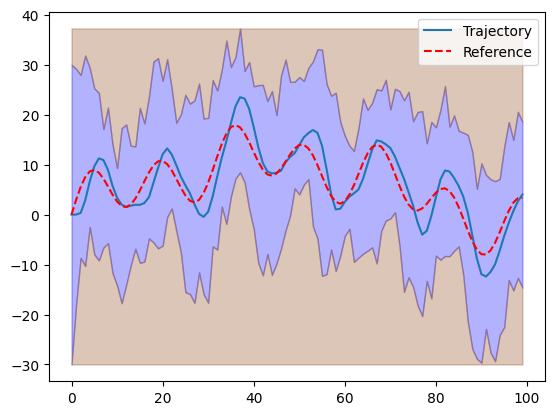

In [13]:
import sys

# Import relevant modules
import uuv_mission.dynamic as dy
import uuv_mission.control as ctrl

sub = dy.Submarine()

# Instantiate your controller (depending on your implementation)
mission = dy.Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class
reference = mission.reference
pos_y = sub.get_position()[1]

Kp = 0.15
Kd = 0.6

# Create a function to call the controller with a given value of kp and kd
def call_controller(kp, kd):
    controller = ctrl.PDController(kp, kd)

    # Instantiate the closed-loop system
    closed_loop = dy.ClosedLoop(sub, controller)

    # Plot trajectory
    trajectory = closed_loop.simulate_with_random_disturbances(mission)
    trajectory.plot_completed_mission(mission)

call_controller(Kp, Kd)



In [14]:
from ipywidgets import interact, FloatSlider

# Create interactive widgets for kp and kd
interact(call_controller, kp=FloatSlider(min=0, max=0.2, step=0.01, value=0.15), kd=FloatSlider(min=0, max=1, step=0.01, value=0.6))

interactive(children=(FloatSlider(value=0.15, description='kp', max=0.2, step=0.01), FloatSlider(value=0.6, de…

<function __main__.call_controller(kp, kd)>